# 黄金与美元实际有效利率

PIMCO在一篇[文章](https://global.pimco.com/en-gbl/insights/viewpoints/demystifying-gold-prices)中认为，影响黄金价格的最主要因素是美元实际有效利率，可以用10年期的TIPS债券的到期收益率来衡量，二者的负相关性非常明显

本文数据来源于[FRED](https://fred.stlouisfed.org/)

In [1]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fred = Fred(api_key='63c26e16e93cb78d3ef46638747ab5ef')

## 读取黄金价格

In [3]:
gold = fred.get_series_latest_release('GOLDAMGBD228NLBM')

In [4]:
gold.tail()

2018-08-22    1196.85
2018-08-23    1187.30
2018-08-24    1189.95
2018-08-27        NaN
2018-08-28    1212.75
dtype: float64

# 读取10年期TIPS到期收益率

In [5]:
tips = fred.get_series_latest_release('DFII10')

In [6]:
tips.tail()

2018-08-21    0.77
2018-08-22    0.74
2018-08-23    0.73
2018-08-24    0.73
2018-08-27    0.74
dtype: float64

## 保存到文件

In [7]:
df = pd.DataFrame({'gold': gold, 'yield': tips})

In [8]:
df.tail()

,gold,yield
2018-08-20,1188.75,0.75
2018-08-21,1194.10,0.77
2018-08-22,1196.85,0.74
2018-08-23,1187.30,0.73
2018-08-24,1189.95,NaN


In [9]:
df.to_excel('../data/TIPS yields.xlsx')

## 画图展示价格曲线

In [7]:
df = pd.read_excel('../data/TIPS yields.xlsx')

In [8]:
df = df.dropna()

In [21]:
df = df[df.index >= '2009-01-01']

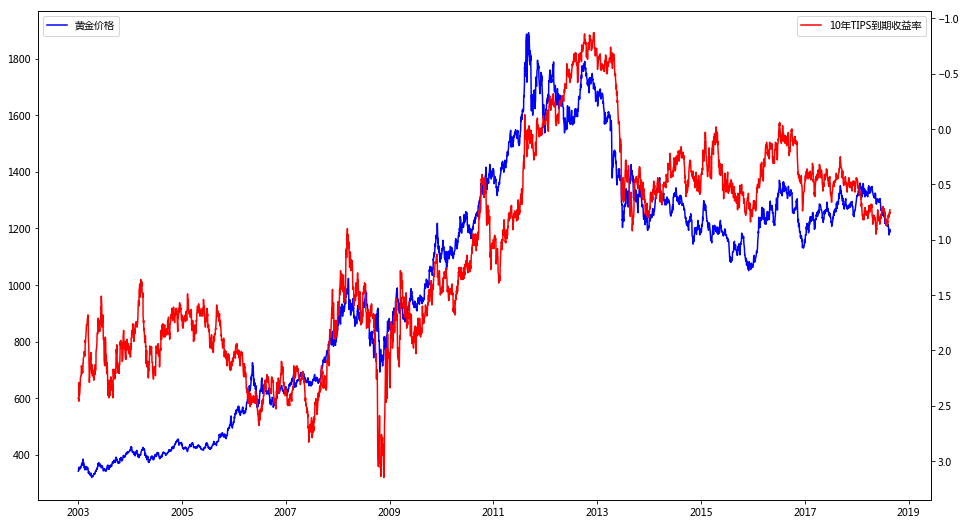

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(df['gold'], label=u'黄金价格', color='blue')
ax.legend(loc='upper left')
ax1 = ax.twinx()
ax1.plot(df['yield'], label=u'10年TIPS到期收益率', color='red')
ax1.legend()
ax1.invert_yaxis()

## 相关性

In [24]:
df['gold'].corr(-df['yield'])

0.7746244611843334